# TF-IDF Project

Task: find the top 100 most relevant articles concerning the query “quantum computing software from IBM”.

Work plan:
1. Study the general information from the dataframe.
2. Perform lemmatization of the text.
3. Create a TF-IDF matrix.
4. Use cosine similarity for measuring similarity between the query and articles.
5. Get top 100 most similar articles to the query.

<a id="0"></a> <br>
# Table of Contents  
1. [Data preprocessing](#1)     
2. [Finding top 100 most relevant articles](#2)
3. [Conclusion](#3)

<a id="1"></a>
## Data preprocessing
[Back to the top](#0)

In [148]:
# pip install nb_black

<IPython.core.display.Javascript object>

In [185]:
#%load_ext nb_black

<IPython.core.display.Javascript object>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy
import sklearn

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<IPython.core.display.Javascript object>

Load the data.

In [151]:
df = pd.read_json("ArticleDataset.json")

<IPython.core.display.Javascript object>

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8436 entries, 0 to 8435
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     8436 non-null   datetime64[ns]
 1   title    8436 non-null   object        
 2   text     8436 non-null   object        
 3   url      8436 non-null   object        
 4   unknown  8436 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 395.4+ KB


<IPython.core.display.Javascript object>

In [153]:
df.head(10)

,date,title,text,url,unknown
0,2020-01-22,TE Connectivity introduces M12 industrial Ethe...,TE Connectivity (TE) now offers M12 data cable...,https://www.automationmag.com/te-connectivity-...,empty
1,2020-01-22,Kirigami designs hold thousands of times their...,"The Japanese art of origami (from ori, folding...",https://techxplore.com/news/2020-01-kirigami-t...,empty
2,2020-01-22,GM's Cruise heads down new road with new robot...,General Motors' self-driving car company will ...,https://techxplore.com/news/2020-01-gm-cruise-...,empty
3,2020-01-22,First fully integrated flexible electronics ma...,Human skin is a fascinating multifunctional or...,https://techxplore.com/news/2020-01-fully-flex...,empty
4,2020-01-22,Study says that we trust our workplace robots,The only constant is change. Presumptions hard...,https://techxplore.com/news/2020-01-workplace-...,empty
5,2020-01-22,Digital Transformation in Manufacturing,"January 21, 2020\nManufacturers are in a diffi...",https://industrytoday.com/digital-transformati...,empty
6,2020-01-22,U.S. Manufacturing’s Not Only Decoupling from ...,"January 21, 2020\nThe Commerce Department’s GD...",https://industrytoday.com/u-s-manufacturings-n...,empty
7,2020-01-22,Importance of Transitional Planning,National Center for the Middle Market (NCMM)\n...,https://industrytoday.com/importance-of-transi...,empty
8,2020-01-22,Lighthouses Revitalize U.S. Manufacturing,World Economic Forum’s Global Lighthouse Netwo...,https://industrytoday.com/lighthouses-revitali...,empty
9,2020-01-22,Nestlé to offer Starbucks experience in the ho...,"American coffeehouse chain, Starbucks, and Swi...",https://www.themanufacturer.com/articles/nestl...,empty


<IPython.core.display.Javascript object>

In [154]:
df["text"]

0       TE Connectivity (TE) now offers M12 data cable...
1       The Japanese art of origami (from ori, folding...
2       General Motors' self-driving car company will ...
3       Human skin is a fascinating multifunctional or...
4       The only constant is change. Presumptions hard...
                              ...                        
8431    About The Author\nFrank Tobe\nFrank Tobe is th...
8432    Frank Tobe\nFrank Tobe is the founder of The R...
8433    Frank Tobe\nFrank Tobe is the founder of The R...
8434    Frank Tobe\nFrank Tobe is the founder of The R...
8435    Frank Tobe\nFrank Tobe is the founder of The R...
Name: text, Length: 8436, dtype: object

<IPython.core.display.Javascript object>

We see that there are upper case words in the texts, let's bring them to lower case for better performance of future exploratory data analysis.

In [155]:
df["lemm_text"] = df["text"].str.lower()

<IPython.core.display.Javascript object>

In [156]:
df.head(10)

,date,title,text,url,unknown,lemm_text
0,2020-01-22,TE Connectivity introduces M12 industrial Ethe...,TE Connectivity (TE) now offers M12 data cable...,https://www.automationmag.com/te-connectivity-...,empty,te connectivity (te) now offers m12 data cable...
1,2020-01-22,Kirigami designs hold thousands of times their...,"The Japanese art of origami (from ori, folding...",https://techxplore.com/news/2020-01-kirigami-t...,empty,"the japanese art of origami (from ori, folding..."
2,2020-01-22,GM's Cruise heads down new road with new robot...,General Motors' self-driving car company will ...,https://techxplore.com/news/2020-01-gm-cruise-...,empty,general motors' self-driving car company will ...
3,2020-01-22,First fully integrated flexible electronics ma...,Human skin is a fascinating multifunctional or...,https://techxplore.com/news/2020-01-fully-flex...,empty,human skin is a fascinating multifunctional or...
4,2020-01-22,Study says that we trust our workplace robots,The only constant is change. Presumptions hard...,https://techxplore.com/news/2020-01-workplace-...,empty,the only constant is change. presumptions hard...
5,2020-01-22,Digital Transformation in Manufacturing,"January 21, 2020\nManufacturers are in a diffi...",https://industrytoday.com/digital-transformati...,empty,"january 21, 2020\nmanufacturers are in a diffi..."
6,2020-01-22,U.S. Manufacturing’s Not Only Decoupling from ...,"January 21, 2020\nThe Commerce Department’s GD...",https://industrytoday.com/u-s-manufacturings-n...,empty,"january 21, 2020\nthe commerce department’s gd..."
7,2020-01-22,Importance of Transitional Planning,National Center for the Middle Market (NCMM)\n...,https://industrytoday.com/importance-of-transi...,empty,national center for the middle market (ncmm)\n...
8,2020-01-22,Lighthouses Revitalize U.S. Manufacturing,World Economic Forum’s Global Lighthouse Netwo...,https://industrytoday.com/lighthouses-revitali...,empty,world economic forum’s global lighthouse netwo...
9,2020-01-22,Nestlé to offer Starbucks experience in the ho...,"American coffeehouse chain, Starbucks, and Swi...",https://www.themanufacturer.com/articles/nestl...,empty,"american coffeehouse chain, starbucks, and swi..."


<IPython.core.display.Javascript object>

Get the lemmatized text in a new column `lemm_text`.

In [181]:
nlp = spacy.load("en_core_web_sm")

<IPython.core.display.Javascript object>

In [158]:
%%time
df['lemm_text'] = df['lemm_text'].apply(lambda text: " ".join(token.lemma_ for token in nlp(text) if not (token.is_stop 
                                                                                                     or token.is_punct
                                                                                                    or token.like_num)))

Wall time: 14min 4s


<IPython.core.display.Javascript object>

In [159]:
df.head()

,date,title,text,url,unknown,lemm_text
0,2020-01-22,TE Connectivity introduces M12 industrial Ethe...,TE Connectivity (TE) now offers M12 data cable...,https://www.automationmag.com/te-connectivity-...,empty,te connectivity te offer m12 datum cable assem...
1,2020-01-22,Kirigami designs hold thousands of times their...,"The Japanese art of origami (from ori, folding...",https://techxplore.com/news/2020-01-kirigami-t...,empty,japanese art origami ori folding kami paper tr...
2,2020-01-22,GM's Cruise heads down new road with new robot...,General Motors' self-driving car company will ...,https://techxplore.com/news/2020-01-gm-cruise-...,empty,general motors self drive car company attempt ...
3,2020-01-22,First fully integrated flexible electronics ma...,Human skin is a fascinating multifunctional or...,https://techxplore.com/news/2020-01-fully-flex...,empty,human skin fascinating multifunctional organ u...
4,2020-01-22,Study says that we trust our workplace robots,The only constant is change. Presumptions hard...,https://techxplore.com/news/2020-01-workplace-...,empty,constant change presumption harden truth occas...


<IPython.core.display.Javascript object>

Save processed dataframe.

In [160]:
df.to_json("df_processed.json")

<IPython.core.display.Javascript object>

In [161]:
df = pd.read_json("df_processed.json")
df.head()

,date,title,text,url,unknown,lemm_text
0,2020-01-22,TE Connectivity introduces M12 industrial Ethe...,TE Connectivity (TE) now offers M12 data cable...,https://www.automationmag.com/te-connectivity-...,empty,te connectivity te offer m12 datum cable assem...
1,2020-01-22,Kirigami designs hold thousands of times their...,"The Japanese art of origami (from ori, folding...",https://techxplore.com/news/2020-01-kirigami-t...,empty,japanese art origami ori folding kami paper tr...
2,2020-01-22,GM's Cruise heads down new road with new robot...,General Motors' self-driving car company will ...,https://techxplore.com/news/2020-01-gm-cruise-...,empty,general motors self drive car company attempt ...
3,2020-01-22,First fully integrated flexible electronics ma...,Human skin is a fascinating multifunctional or...,https://techxplore.com/news/2020-01-fully-flex...,empty,human skin fascinating multifunctional organ u...
4,2020-01-22,Study says that we trust our workplace robots,The only constant is change. Presumptions hard...,https://techxplore.com/news/2020-01-workplace-...,empty,constant change presumption harden truth occas...


<IPython.core.display.Javascript object>

In [162]:
df[df["lemm_text"].isna()]

,date,title,text,url,unknown,lemm_text


<IPython.core.display.Javascript object>

We see that there are no rows with empty values in the `lemm_text` column.

In [163]:
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

Find the most frequently occurring words in the texts.

In [164]:
common_words = Counter(" ".join(df["lemm_text"]).split()).most_common(10)

<IPython.core.display.Javascript object>

In [165]:
def extract(lst, i):
    return [item[i] for item in lst]


words_list = extract(common_words, 0)
counts_list = extract(common_words, 1)

<IPython.core.display.Javascript object>

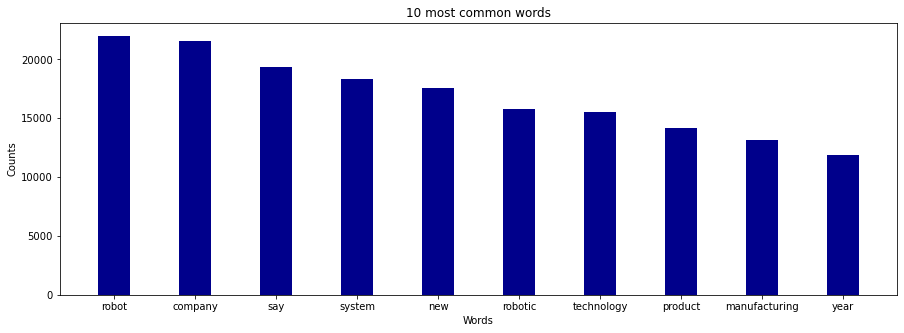

<IPython.core.display.Javascript object>

In [166]:
fig = plt.figure(figsize=(15, 5))

plt.bar(words_list, counts_list, color="darkblue", width=0.4)

plt.xlabel("Words")
plt.ylabel("Counts")
plt.title("10 most common words")
plt.show()

We see that the words related to IT and electronics occur most often. It is also worth noting that there are no punctuation marks, numbers, and articles in the graph, which indicates that the text processing is correct.

<a id="2"></a>
## Finding top 100 most relevant articles
[Back to the top](#0)

Let's first add the query text to the dataframe.

In [167]:
df_query = {
    "date": 0,
    "title": "query",
    "text": "quantum computing software from IBM",
    "url": "www",
    "unknown": "empty",
    "lemm_text": "quantum computing software ibm",
}
df = df.append(df_query, ignore_index=True)

<IPython.core.display.Javascript object>

In [168]:
df.tail()

,date,title,text,url,unknown,lemm_text
8432,2008-11-01 00:00:00,Popular Products – Rovio by Wowee,Frank Tobe\nFrank Tobe is the founder of The R...,https://www.therobotreport.com/popular-product...,delete,frank tobe \n frank tobe founder robot report ...
8433,2008-11-01 00:00:00,Popular Products – Verro by iRobot,Frank Tobe\nFrank Tobe is the founder of The R...,https://www.therobotreport.com/popular-product...,delete,frank tobe \n frank tobe founder robot report ...
8434,2008-10-31 00:00:00,Watch this multi-purpose snake crawl up a leg,Frank Tobe\nFrank Tobe is the founder of The R...,https://www.therobotreport.com/watch-this-mult...,delete,frank tobe \n frank tobe founder robot report ...
8435,2008-10-22 00:00:00,2008 Engelberger Robotics Awards,Frank Tobe\nFrank Tobe is the founder of The R...,https://www.therobotreport.com/2008-engelberge...,delete,frank tobe \n frank tobe founder robot report ...
8436,0,query,quantum computing software from IBM,www,empty,quantum computing software ibm


<IPython.core.display.Javascript object>

Now we can produce the TF-IDF matrix.

In [169]:
tfidf = TfidfVectorizer()
df_tfidf = tfidf.fit_transform(df["lemm_text"])
df_tfidf.shape

(8437, 60679)

<IPython.core.display.Javascript object>

We use cosine similarity to calculate a numeric quantity that denotes the similarity between the query and texts from the dataframe. 

In [171]:
cosine_sim = cosine_similarity(df_tfidf, df_tfidf)

<IPython.core.display.Javascript object>

In [172]:
cosine_sim.shape

(8437, 8437)

<IPython.core.display.Javascript object>

Now we are ready to find 100 most similar articles to the query.

In [173]:
indices = pd.Series(df.index, index=df["title"])

<IPython.core.display.Javascript object>

In [174]:
indices.shape

(8437,)

<IPython.core.display.Javascript object>

In [175]:
idx = indices["query"]

<IPython.core.display.Javascript object>

In [176]:
sim_scores = list(enumerate(cosine_sim[idx]))

<IPython.core.display.Javascript object>

In [177]:
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

<IPython.core.display.Javascript object>

In [178]:
sim_scores = sim_scores[1:101]

<IPython.core.display.Javascript object>

In [179]:
article_indices = [i[0] for i in sim_scores]

<IPython.core.display.Javascript object>

Let's print top 10 most relevant articles.

In [187]:
df[["title", "text"]].iloc[article_indices].head(10)

,title,text
1557,IBM unveils new commercial Q System One quantu...,IBM has released the world's first-ever commer...
2212,IBM introduces new Watson solutions and servic...,IBMtechnology\nThe US-based computer manufactu...
5894,IBM Investing Billions in 'Internet of Things',NEW YORK - IBM (IW 500/11) announced Tuesday i...
228,Intel Introduces cryogenic control chip 'Horse...,Intel has announced the development of a cryog...
353,An artificial intelligence algorithm can learn...,Artificial intelligence can be used to predict...
2086,IBM announces $34bn acquisition of Red Hat,technologyIBMDigital Transformation\nThe US-ba...
3578,IBM and MIT partner on AI research lab,IBM and the Mass. Institute of Technology plan...
1253,AI-Powered IIoT Solution to Help Manage and Mo...,"In the industrial setting, monitoring and opti..."
1893,Three ways that edge computing can benefit man...,technologyIoTData\nThe UK proudly holds the po...
3967,IBM Tasks Watson IoT with Quality Assurance on...,IBM’s Watson is a platform of many talents. It...


<IPython.core.display.Javascript object>

<a id="3"></a>
## Conclusion
[Back to the top](#0)

In this project we have used TF-IDF matrix to get a numerical evaluation of the importantance of each word in every article and cosine similarity to measure the similarity between the query and texts from the dataframe. As a result, we have found the articles which plot is close to the query context.